In [1]:
# Module used to connect Python with MongoDb
import pymongo
import sys
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np

### Create Database Connection
### Load Data into Database

In [2]:
# The default port used by MongoDB is 27017  (removes any items already there, then inserts new data)
mng_client = pymongo.MongoClient('localhost', 27017)

# Replaces the mongo db name
mng_db = mng_client['CO2']

# Replace mongo db collection name
collection_name = 'gas_prices' 
mng_col = mng_db[collection_name]

# Get csv
csv_file_gas_prices = "Data/clean_gas_prices.csv"
data_gp = pd.read_csv(csv_file_gas_prices)
data_gp_json = json.loads(data_gp.to_json(orient='records'))
mng_col.delete_many({})
mng_col.insert_many(data_gp_json)


In [6]:
# Replace mongo db collection name (removes any items already there, then inserts new data)
collection_name = 'emission_data' 
mng_col2 = mng_db[collection_name]

# Get csv
csv_file_emission = "Data/clean_emission_data.csv"
data_ed = pd.read_csv(csv_file_emission)
data_ged_json = json.loads(data_ed.to_json(orient='records'))
mng_col2.delete_many({})
mng_col2.insert_many(data_ged_json)

### QUERIES:   - get data for visualizations - seperate out tables by Province, to add in the emissions

- seperate out tables by Province, to add in the emissions later

In [37]:
#Get Ontario Data List as DataFrame
collection = mng_db.gas_prices
ont_col = pd.DataFrame(list(mng_db.gas_prices.find({'Province':'Ontario'})))
ont_col.head()

,_id,Year,Province,Price
0,618aa8e2da36f8938f0549e0,1990,Ontario,57.591667
1,618aa8e2da36f8938f0549e4,1991,Ontario,56.308333
2,618aa8e2da36f8938f0549e8,1992,Ontario,54.825000
3,618aa8e2da36f8938f0549ec,1993,Ontario,53.837500
4,618aa8e2da36f8938f0549f0,1994,Ontario,53.025000


In [38]:
#Get BC Data List as DataFrame
bc_col = pd.DataFrame(list(mng_db.gas_prices.find({'Province':'British Columbia'})))
bc_col.head()

,_id,Year,Province,Price
0,618aa8e2da36f8938f0549df,1990,British Columbia,60.766667
1,618aa8e2da36f8938f0549e3,1991,British Columbia,58.025000
2,618aa8e2da36f8938f0549e7,1992,British Columbia,52.970833
3,618aa8e2da36f8938f0549eb,1993,British Columbia,52.875000
4,618aa8e2da36f8938f0549ef,1994,British Columbia,53.712500


In [39]:
#Get Alberta Data List as DataFrame
alb_col = pd.DataFrame(list(mng_db.gas_prices.find({'Province':'Alberta'})))
alb_col.head()

,_id,Year,Province,Price
0,618aa8e2da36f8938f0549de,1990,Alberta,53.895833
1,618aa8e2da36f8938f0549e2,1991,Alberta,50.141667
2,618aa8e2da36f8938f0549e6,1992,Alberta,47.083333
3,618aa8e2da36f8938f0549ea,1993,Alberta,46.500000
4,618aa8e2da36f8938f0549ee,1994,Alberta,46.400000


In [40]:
#Get Quebec Data List as DataFrame
qc_col = pd.DataFrame(list(mng_db.gas_prices.find({'Province':'Quebec'})))
qc_col.head()

,_id,Year,Province,Price
0,618aa8e2da36f8938f0549e1,1990,Quebec,62.616667
1,618aa8e2da36f8938f0549e5,1991,Quebec,64.279167
2,618aa8e2da36f8938f0549e9,1992,Quebec,60.658333
3,618aa8e2da36f8938f0549ed,1993,Quebec,58.241667
4,618aa8e2da36f8938f0549f1,1994,Quebec,55.941667


- get the emission data
- to merge provincial data with emissions

In [41]:
#Get CO2 Emission Data List as DataFrame
em = pd.DataFrame(list(mng_db.emission_data.find()))
em.head()

,_id,Country,Year,CO2
0,618aafa9da36f8938f054a5a,Canada,1990,458.007408
1,618aafa9da36f8938f054a5b,Canada,1991,449.699173
2,618aafa9da36f8938f054a5c,Canada,1992,463.521037
3,618aafa9da36f8938f054a5d,Canada,1993,463.993303
4,618aafa9da36f8938f054a5e,Canada,1994,478.267071


In [42]:
#Merge Ontario Data to CO2 Emission Data by Year
ont_col_m = ont_col.merge(em, how='inner', on='Year')
ont_col_m.head()

,_id_x,Year,Province,Price,_id_y,Country,CO2
0,618aa8e2da36f8938f0549e0,1990,Ontario,57.591667,618aafa9da36f8938f054a5a,Canada,458.007408
1,618aa8e2da36f8938f0549e4,1991,Ontario,56.308333,618aafa9da36f8938f054a5b,Canada,449.699173
2,618aa8e2da36f8938f0549e8,1992,Ontario,54.825000,618aafa9da36f8938f054a5c,Canada,463.521037
3,618aa8e2da36f8938f0549ec,1993,Ontario,53.837500,618aafa9da36f8938f054a5d,Canada,463.993303
4,618aa8e2da36f8938f0549f0,1994,Ontario,53.025000,618aafa9da36f8938f054a5e,Canada,478.267071


In [43]:
#Removed unnecessary columns
ont_col_m = ont_col_m.drop(labels=['_id_x','_id_y','Country'], axis=1)
ont_col_m.head()

,Year,Province,Price,CO2
0,1990,Ontario,57.591667,458.007408
1,1991,Ontario,56.308333,449.699173
2,1992,Ontario,54.825000,463.521037
3,1993,Ontario,53.837500,463.993303
4,1994,Ontario,53.025000,478.267071


In [44]:
#Merge BC Data to CO2 Emission Data by Year
bc_col_m = bc_col.merge(em, how='inner', on='Year')
bc_col_m.head()

,_id_x,Year,Province,Price,_id_y,Country,CO2
0,618aa8e2da36f8938f0549df,1990,British Columbia,60.766667,618aafa9da36f8938f054a5a,Canada,458.007408
1,618aa8e2da36f8938f0549e3,1991,British Columbia,58.025000,618aafa9da36f8938f054a5b,Canada,449.699173
2,618aa8e2da36f8938f0549e7,1992,British Columbia,52.970833,618aafa9da36f8938f054a5c,Canada,463.521037
3,618aa8e2da36f8938f0549eb,1993,British Columbia,52.875000,618aafa9da36f8938f054a5d,Canada,463.993303
4,618aa8e2da36f8938f0549ef,1994,British Columbia,53.712500,618aafa9da36f8938f054a5e,Canada,478.267071


In [45]:
len(bc_col_m)

31

In [46]:
#Removed unnecessary columns
bc_col_m = bc_col_m.drop(labels=['_id_x','_id_y','Country'], axis=1)
bc_col_m.head()

,Year,Province,Price,CO2
0,1990,British Columbia,60.766667,458.007408
1,1991,British Columbia,58.025000,449.699173
2,1992,British Columbia,52.970833,463.521037
3,1993,British Columbia,52.875000,463.993303
4,1994,British Columbia,53.712500,478.267071


In [47]:
#Merge Alberta Data to CO2 Emission Data by Year
alb_col_m = alb_col.merge(em, how='inner', on='Year')
alb_col_m.head()

,_id_x,Year,Province,Price,_id_y,Country,CO2
0,618aa8e2da36f8938f0549de,1990,Alberta,53.895833,618aafa9da36f8938f054a5a,Canada,458.007408
1,618aa8e2da36f8938f0549e2,1991,Alberta,50.141667,618aafa9da36f8938f054a5b,Canada,449.699173
2,618aa8e2da36f8938f0549e6,1992,Alberta,47.083333,618aafa9da36f8938f054a5c,Canada,463.521037
3,618aa8e2da36f8938f0549ea,1993,Alberta,46.500000,618aafa9da36f8938f054a5d,Canada,463.993303
4,618aa8e2da36f8938f0549ee,1994,Alberta,46.400000,618aafa9da36f8938f054a5e,Canada,478.267071


In [48]:
#Removed unnecessary columns
alb_col_m = alb_col_m.drop(labels=['_id_x','_id_y','Country'], axis=1)
alb_col_m.head()

,Year,Province,Price,CO2
0,1990,Alberta,53.895833,458.007408
1,1991,Alberta,50.141667,449.699173
2,1992,Alberta,47.083333,463.521037
3,1993,Alberta,46.500000,463.993303
4,1994,Alberta,46.400000,478.267071


In [49]:
#Merge Alberta Data to CO2 Emission Data by Year
qc_col_m = qc_col.merge(em, how='inner', on='Year')
qc_col_m.head()

,_id_x,Year,Province,Price,_id_y,Country,CO2
0,618aa8e2da36f8938f0549e1,1990,Quebec,62.616667,618aafa9da36f8938f054a5a,Canada,458.007408
1,618aa8e2da36f8938f0549e5,1991,Quebec,64.279167,618aafa9da36f8938f054a5b,Canada,449.699173
2,618aa8e2da36f8938f0549e9,1992,Quebec,60.658333,618aafa9da36f8938f054a5c,Canada,463.521037
3,618aa8e2da36f8938f0549ed,1993,Quebec,58.241667,618aafa9da36f8938f054a5d,Canada,463.993303
4,618aa8e2da36f8938f0549f1,1994,Quebec,55.941667,618aafa9da36f8938f054a5e,Canada,478.267071


In [50]:
#Removed unnecessary columns
qc_col_m = qc_col_m.drop(labels=['_id_x','_id_y','Country'], axis=1)
qc_col_m.head()

,Year,Province,Price,CO2
0,1990,Quebec,62.616667,458.007408
1,1991,Quebec,64.279167,449.699173
2,1992,Quebec,60.658333,463.521037
3,1993,Quebec,58.241667,463.993303
4,1994,Quebec,55.941667,478.267071


### Data merged with emmissions provincially
### Now Appending all Province DataFrames together

In [51]:
#Appending the data
appended_data = ont_col_m.append(bc_col_m)
appended_data.tail()

,Year,Province,Price,CO2
26,2016,British Columbia,114.975000,559.566962
27,2017,British Columbia,130.270833,569.360436
28,2018,British Columbia,146.462500,579.470372
29,2019,British Columbia,145.462500,582.389608
30,2020,British Columbia,124.483333,535.822990


In [52]:
len(appended_data)

62

In [53]:
appended_data = appended_data.append(alb_col_m)
appended_data.tail()

,Year,Province,Price,CO2
26,2016,Alberta,87.954167,559.566962
27,2017,Alberta,99.679167,569.360436
28,2018,Alberta,118.300000,579.470372
29,2019,Alberta,104.166667,582.389608
30,2020,Alberta,92.125000,535.822990


In [54]:
len(appended_data)

93

In [55]:
appended_data = appended_data.append(qc_col_m)
appended_data.tail()

,Year,Province,Price,CO2
26,2016,Quebec,104.912500,559.566962
27,2017,Quebec,115.425000,569.360436
28,2018,Quebec,128.708333,579.470372
29,2019,Quebec,122.504167,582.389608
30,2020,Quebec,104.908333,535.822990


In [56]:
len(appended_data)

124

In [57]:
#Resetting the Index
appended_data.reset_index(inplace=True,drop=True)

In [58]:
appended_data.head()

,Year,Province,Price,CO2
0,1990,Ontario,57.591667,458.007408
1,1991,Ontario,56.308333,449.699173
2,1992,Ontario,54.825000,463.521037
3,1993,Ontario,53.837500,463.993303
4,1994,Ontario,53.025000,478.267071


In [59]:
clean_data = appended_data.copy()

In [36]:
clean_data.head()

,Year,Province,Price,CO2,_id_x,_id_y,Country
0,1990,Ontario,57.591667,458.007408,NaN,NaN,NaN
1,1991,Ontario,56.308333,449.699173,NaN,NaN,NaN
2,1992,Ontario,54.825000,463.521037,NaN,NaN,NaN
3,1993,Ontario,53.837500,463.993303,NaN,NaN,NaN
4,1994,Ontario,53.025000,478.267071,NaN,NaN,NaN


In [61]:
# 31 years X 4 provinces = 124
len(clean_data)

124

### VISUALIZATION

Are CO2 emissions relative to gas prices?

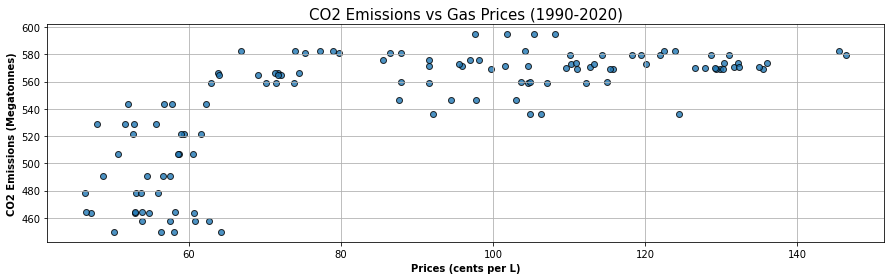

In [62]:
#Plot: CO2 Emissions vs Gas Prices 
fig, ax = plt.subplots(figsize=(15,4))

ax.scatter(clean_data["Price"], clean_data["CO2"], alpha = 0.8, edgecolors="k", linewidth=1)

#Labels
ax.set_title("CO2 Emissions vs Gas Prices (1990-2020)",fontsize=15) 
ax.set_xlabel("Prices (cents per L)", fontweight='bold')
ax.set_ylabel("CO2 Emissions (Megatonnes)", fontweight='bold')
#ax.set_xlim(0, 9)
ax.grid(True)
#ax.xaxis.grid(False, which='minor')
#set the number of minor ticks between the major ticks
#ax.xaxis.set_minor_locator(AutoMinorLocator(10))

#save the figure
#plt.savefig(output_folder + "9_EarthquakeMagnitudeVsPcOceanicEvent.png", facecolor = 'white')
plt.show()

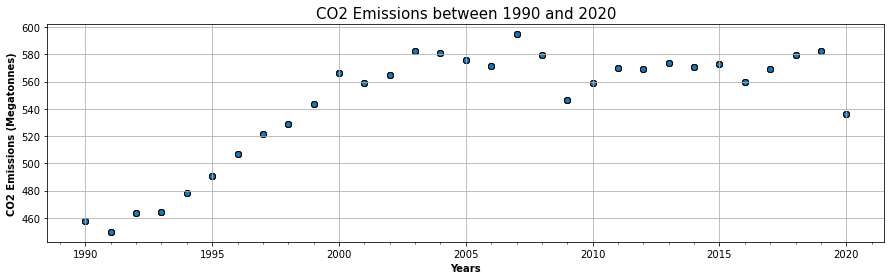

In [63]:
#Plot: CO2 Emissions per Year 
fig, ax = plt.subplots(figsize=(15,4))

ax.scatter(clean_data["Year"], clean_data["CO2"], alpha = 0.8, edgecolors="k", linewidth=1)

#Labels
ax.set_title("CO2 Emissions between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("CO2 Emissions (Megatonnes)", fontweight='bold')
#ax.set_xlim(0, 9)
ax.grid(True)
ax.xaxis.grid(False, which='minor')
#set the number of minor ticks between the major ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))

#save the figure
#plt.savefig(output_folder + "9_EarthquakeMagnitudeVsPcOceanicEvent.png", facecolor = 'white')
plt.show()

### Logarithmic chart

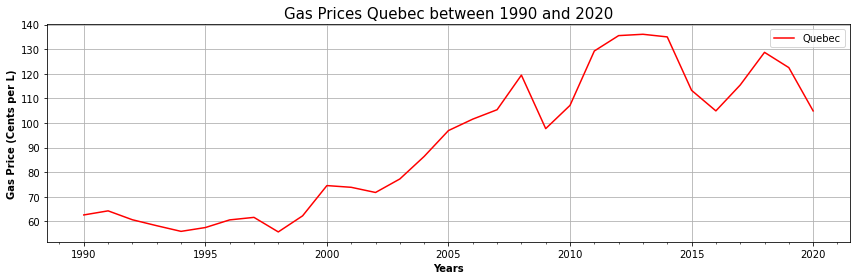

In [160]:
# line Quebec
labels = [clean_data['Year'].unique()]

qc = clean_data[clean_data['Province']== 'Quebec'][['Year','Price']]
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(qc.Year,qc.Price, color='r', label='Quebec')

ax.grid(True)
ax.xaxis.grid(False, which='minor')
ax.xaxis.set_minor_locator(AutoMinorLocator(5))

#Labels
ax.set_title("Gas Prices Quebec between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 1998 prices went down, but emissions went UP  !!
# 2009 both went down
# 2008 both went up

# almost same curve. VAries at beginning, emissions went up at far more steady rate as gas price rose slower.

In [ ]:
#### Quebec
- 1998: gas prices dipped, emissions went up!
- 2008: gas prices dipped from previous years
- 2009: both went down, emissions more drastically than price, RECESSION at this time
- 2015 major dip gas price, emissions still up, emissions 2011: 2015, stable, year after dip, (imposed env sanctions: ? 4 years before prices jumped)
- 2016 further dip / emissions went down (not as many people buying?)
- 2020 dip in prices overall  / emmisions went down  (pandemic, prices went down, no one driving)

- Canada: Climate plans: 2015 : 
- Growing supply 2014-2016 of oil, price plumet , us market came in, slow down of exporters 70%
- Emissions still steady at 2015

- Then 2016 emissions plumet, with gas price

In [64]:
#create a new column
np.seterr(divide='ignore', invalid='ignore')
plt.figure(figsize=(9,5))

# Make a separate list for each magnitude
x9 = list(earthquake_mag[earthquake_mag['Magnitude']>=9]['Alert'])
x8 = list(earthquake_mag[(earthquake_mag['Magnitude']>=8) & (earthquake_mag['Magnitude']<9)]['Alert'])
x7 = list(earthquake_mag[(earthquake_mag['Magnitude']>=7) & (earthquake_mag['Magnitude']<8)]['Alert'])
x6 = list(earthquake_mag[(earthquake_mag['Magnitude']>=6) & (earthquake_mag['Magnitude']<7)]['Alert'])
x5 = list(earthquake_mag[(earthquake_mag['Magnitude']>=5) & (earthquake_mag['Magnitude']<6)]['Alert'])
x4 = list(earthquake_mag[(earthquake_mag['Magnitude']>=4) & (earthquake_mag['Magnitude']<5)]['Alert'])
x3 = list(earthquake_mag[(earthquake_mag['Magnitude']>=3) & (earthquake_mag['Magnitude']<4)]['Alert'])
x2 = list(earthquake_mag[(earthquake_mag['Magnitude']>=2) & (earthquake_mag['Magnitude']<3)]['Alert'])
x1 = list(earthquake_mag[(earthquake_mag['Magnitude']>=1) & (earthquake_mag['Magnitude']<2)]['Alert'])
x0 = list(earthquake_mag[(earthquake_mag['Magnitude']>=0) & (earthquake_mag['Magnitude']<1)]['Alert'])

# Assign colors for each magnitude and the names
colors = ['black', 'olive', 'cyan', 'pink', 'brown', 'green', 'blue', 'orange', 'purple', 'red']
names = ['Mag 0', 'Mag 1', 'Mag 2', 'Mag 3', 'Mag 4','Mag 5', 'Mag 6', 'Mag 7', 'Mag 8', 'Mag 9']

# Define the plot
plt.hist([x0, x1, x2, x3, x4, x5, x6, x7, x8, x9], bins = 4, density=True,
         color = colors, label=names) 

# assign labels
plt.xlabel("Alert Levels", fontsize=14, fontweight='bold')
plt.ylabel("Density", fontsize=14, fontweight='bold')
plt.title("Density Histogram of Earthquake Alert Level Showing Magnitudes",fontsize=14)


plt.xticks(rotation=45)

plt.legend(title='Legend',fancybox=True) 
plt.tight_layout()
#save the figure
plt.savefig(output_folder + "8_DensityHistEQAlertWithMagnitudes.png", facecolor = 'white')

plt.show()

NameError: name 'earthquake_mag' is not defined

<Figure size 648x360 with 0 Axes>

AttributeError: 'Rectangle' object has no property 'edgecolors'

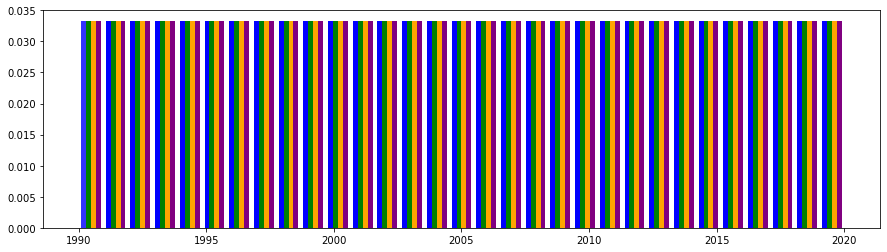

In [65]:
# AS HISTOGRAM WILL NOT BE NEEDED
#Plot: CO2 Emissions per Year 
fig, ax = plt.subplots(figsize=(15,4))


x0 = list(clean_data[clean_data['Province']== 'Ontario']['Year'])
x1 = list(clean_data[clean_data['Province']== 'British Columbia']['Year'])
x2 = list(clean_data[clean_data['Province']== 'Alberta']['Year'])
x3 = list(clean_data[clean_data['Province']== 'Quebec']['Year'])

colors = ['blue','green','orange','purple']
names = ['Ontario','British Columbia','Alberta','Quebec']


ax.hist([x0,x1,x2,x3], bins=31, density=True, alpha = 0.8, edgecolors="k", 
           linewidth=1, color=colors, label=names)

#Labels
ax.set_title("Gas Prices between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
#ax.set_xlim(0, 9)
ax.grid(True)
#ax.xaxis.grid(False, which='minor')
#set the number of minor ticks between the major ticks
#ax.xaxis.set_minor_locator(AutoMinorLocator(10))

plt.legend(title='Legend',fancybox=True) 
plt.tight_layout()

#save the figure
#plt.savefig(output_folder + "9_EarthquakeMagnitudeVsPcOceanicEvent.png", facecolor = 'white')
plt.show()

ValueError: 'o' is neither a valid single color nor a color sequence consisting of single character color specifiers such as 'rgb'. Note also that the latter is deprecated.

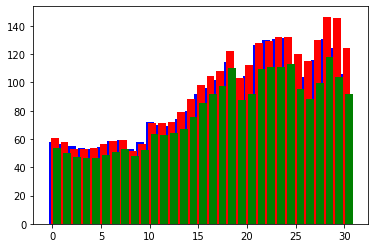

In [112]:

# as bar chart: NOT WORKING
labels = [clean_data['Year'].unique()]

x0 = list(clean_data[clean_data['Province']== 'Ontario']['Price'])
x1 = list(clean_data[clean_data['Province']== 'British Columbia']['Price'])
x2 = list(clean_data[clean_data['Province']== 'Alberta']['Price'])
x3 = list(clean_data[clean_data['Province']== 'Quebec']['Price'])

width = 0.03
x=np.arange(31)

fig, ax = plt.subplots()

ont = ax.bar(x + 0.00, x0, color='b', label='Ontario')
bc = ax.bar(x + 0.25, x1, color='r', label='British Columbia')
alb = ax.bar(x + 0.50, x2, color='g', label='Alberta')
qc = ax.bar(x + 0.75, x3, color='o', label='Quebec')

#Labels
ax.set_title("Gas Prices between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
ax.legend()

# ax.bar_label(ont, padding=3)
# ax.bar_label(bc, padding=3)
# ax.bar_label(alb, padding=3)
# ax.bar_label(qc, padding=3)

fig.tight_layout()
plt.show()


In [67]:
labels

[array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
        2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])]

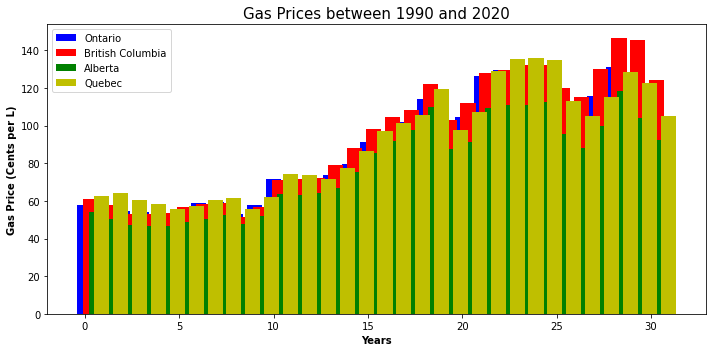

In [118]:
# sherry test
#x = [clean_data['Year'].unique()]


x0 = list(clean_data[clean_data['Province']== 'Ontario']['Price'])
x1 = list(clean_data[clean_data['Province']== 'British Columbia']['Price'])
x2 = list(clean_data[clean_data['Province']== 'Alberta']['Price'])
x3 = list(clean_data[clean_data['Province']== 'Quebec']['Price'])

width = 0.03
#x = len([clean_data['Year'].unique()])
indices = np.arange(len([clean_data['Year'].unique()]))
x = len(clean_data['Year'].unique())

fig, ax = plt.subplots(figsize=(10,5))

ont = ax.bar(x + 0.00, x0, color='b', label='Ontario')
bc = ax.bar(x + 0.3, x1, color='r', label='British Columbia')
alb = ax.bar(x + 0.6, x2, color='g', label='Alberta')
qc = ax.bar(x + 0.9, x3, color='y', label='Quebec')

#Labels
ax.set_title("Gas Prices between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
ax.legend()

# not working, need a way to pad? or seperate more
# ax.bar_label(ont, padding=3)
# ax.bar_label(bc, padding=3)
# ax.bar_label(alb, padding=3)
# ax.bar_label(qc, padding=3)

# correct the x ticks to have the labels for 1990-2020
# plt.xticks(indices+width/2., 
#            ['T{}'.format(i) for i in range(len(highPower))] )

fig.tight_layout()
plt.show()


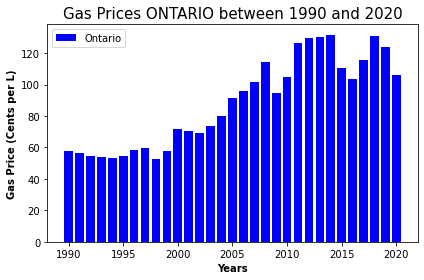

In [137]:
# bar ONTARIO

labels = [clean_data['Year'].unique()]
on = clean_data[clean_data['Province']== 'Ontario'][['Year','Price']]

fig, ax = plt.subplots()

ont = ax.bar(x=on.Year,height=on.Price, color='b', label='Ontario')


#Labels
ax.set_title("Gas Prices ONTARIO between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()


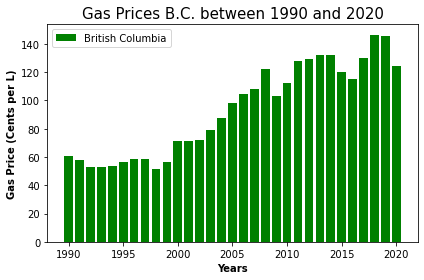

In [138]:
# bar BC
labels = [clean_data['Year'].unique()]

bc = clean_data[clean_data['Province']== 'British Columbia'][['Year','Price']]
fig, ax = plt.subplots()

bcb = ax.bar(x=bc.Year,height=bc.Price, color='g', label='British Columbia')

#Labels
ax.set_title("Gas Prices B.C. between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()


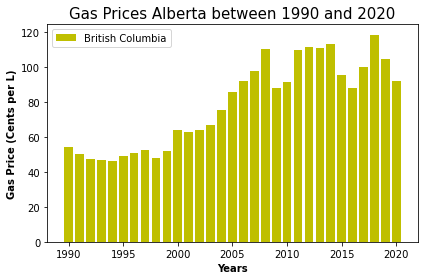

In [140]:
# bar Alberta
labels = [clean_data['Year'].unique()]

ab = clean_data[clean_data['Province']== 'Alberta'][['Year','Price']]
fig, ax = plt.subplots()

abb = ax.bar(x=ab.Year,height=ab.Price, color='y', label='British Columbia')

#Labels
ax.set_title("Gas Prices Alberta between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

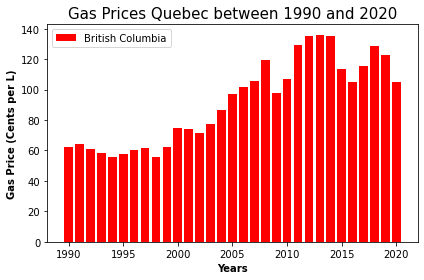

In [151]:
# bar Quebec
labels = [clean_data['Year'].unique()]

qc = clean_data[clean_data['Province']== 'Quebec'][['Year','Price']]
fig, ax = plt.subplots()

qcb = ax.bar(x=qc.Year,height=qc.Price, color='r', label='British Columbia')

#Labels
ax.set_title("Gas Prices Quebec between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

#### Quebec
- 1998: gas prices dipped
- 2008: gas prices dipped from previous years
- 2015 major dip, emissions 2011: 2015, stable, year after dip, (imposed env sanctions: ? 4 years before prices jumped)
- 2016 further dip / emissions went down (not as many people buying?)
- 2020 dip in prices overall  / emmisions went down  (pandemic, prices went down, no one driving)

- Canada: Climate plans: 2015 : 
- Growing supply 2014-2016 of oil, price plumet , us market came in, slow down of exporters 70%

In [ ]:
# compare to emmission in these
- 2018 and 2019 emmisions went down

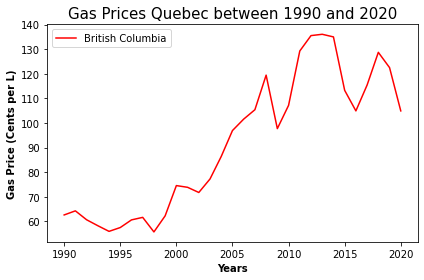

In [148]:
# bar Quebec
labels = [clean_data['Year'].unique()]

qc = clean_data[clean_data['Province']== 'Quebec'][['Year','Price']]
fig, ax = plt.subplots()

ax.plot(qc.Year,qc.Price, color='r', label='British Columbia')

#Labels
ax.set_title("Gas Prices Quebec between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()